## NYC Schools Guided Project

Dennis Elwell

This is a guided project in R that I completed in December 2019 using the online data science learning platform Dataquest.In this project, I will look at data from New York City schools to understand whether parent, teacher or student perceptions of the below factors affect average SAT scores:

1. Safety
2. Engagement
3. Communication
4. Academics

The data, collected in 2011, are publicly accessible and can be accessed [here](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8).

To begin, I'll import the tidyverse.

In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tidyr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Next, I'll set my working directory and import the data.

In [2]:
setwd("C:/Users/Dennis/Desktop/nyc_schools_project")
sat <- read_csv("combined.csv")
gened <- read_tsv("masterfile11_gened_final.txt")
d75 <- read_tsv("masterfile11_d75_final.txt")

Parsed with column specification:
cols(
  .default = col_double(),
  DBN = col_character(),
  school_name = col_character(),
  boro = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  dbn = col_character(),
  bn = col_character(),
  schoolname = col_character(),
  studentssurveyed = col_character(),
  schooltype = col_character(),
  p_q1 = col_logical(),
  p_q3d = col_logical(),
  p_q9 = col_logical(),
  p_q10 = col_logical(),
  p_q12aa = col_logical(),
  p_q12ab = col_logical(),
  p_q12ac = col_logical(),
  p_q12ad = col_logical(),
  p_q12ba = col_logical(),
  p_q12bb = col_logical(),
  p_q12bc = col_logical(),
  p_q12bd = col_logical(),
  t_q6m = col_logical(),
  t_q9 = col_logical(),
  t_q10a = col_logical()
  # ... with 18 more columns
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  dbn = col_character(),
  bn = col_character(),
  s

Now, let's preview our data for sat, which is a dataset showing SAT scores of NYC schools.

In [3]:
head(sat)

DBN,school_name,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,...,hispanic_per,white_per,male_per,female_per,Total Cohort,grads_percent,dropout_percent,boro,lat,long
01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122,2.5,NA,NA,...,53.8,1.7,61.4,38.6,78,55.1,14.1,Manhattan,40.71376,-73.98526
01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,39.0,49,10,...,45.9,2.3,57.4,42.6,124,42.7,16.1,Manhattan,40.71233,-73.98480
01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149,19.0,21,NA,...,55.4,10.4,54.7,45.3,90,77.8,5.6,Manhattan,40.72978,-73.98304
01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174,2.5,NA,NA,...,59.4,3.6,43.3,56.7,NA,NA,NA,NA,NA,NA
01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207,2.5,NA,NA,...,56.9,1.6,46.3,53.7,84,56.0,6.0,Manhattan,40.72057,-73.98567
01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316,1205,24.0,26,24,...,NA,NA,NA,NA,193,54.4,18.1,NA,NA,NA


Then, let's take a look at our gened data.

In [4]:
head(gened)

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
01M015,M015,P.S. 015 Roberto Clemente,0,No,0,Elementary School,NA,88,60,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M019,M019,P.S. 019 Asher Levy,0,No,0,Elementary School,NA,100,60,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M020,M020,P.S. 020 Anna Silver,0,No,0,Elementary School,NA,88,73,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0,Elementary / Middle School,89,73,50,...,20,16,23,54,33,29,31,46,16,8
01M063,M063,P.S. 063 William McKinley,0,No,0,Elementary School,NA,100,60,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M064,M064,P.S. 064 Robert Simon,0,No,0,Elementary School,NA,94,61,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Then, we'll look at our d75 data

In [5]:
head(d75)

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
75K004,K004,P.S. K004,1,Yes,0,District 75 Special Education,38,90,72,...,29,0,0,0,0,0,0,0,0,0
75K036,K036,P.S. 36,1,Yes,NA,District 75 Special Education,70,69,44,...,20,27,19,9,2,6,1,2,0,0
75K053,K053,P.S. K053,1,Yes,NA,District 75 Special Education,94,97,53,...,14,12,12,10,21,13,11,2,0,0
75K077,K077,P.S. K077,1,Yes,NA,District 75 Special Education,95,65,55,...,14,14,7,11,16,10,6,4,7,7
75K140,K140,P.S. K140,1,Yes,0,District 75 Special Education,77,70,42,...,35,34,17,2,0,0,0,0,0,0
75K141,K141,P.S. K141,1,Yes,NA,District 75 Special Education,73,55,29,...,26,34,26,0,0,0,2,0,0,0


Let's trim our gened dataframe so that we're only looking at necessary variables.

In [6]:
gened_trimmed <- gened %>%
  select(dbn,bn, schoolname, d75,studentssurveyed,highschool,schooltype,saf_tot_11, com_tot_11, eng_tot_11, aca_tot_11) %>%
  rename(safety_respect_score = saf_tot_11, communication_score = com_tot_11, engagement_score = eng_tot_11,
         academic_expectations_score = aca_tot_11)

head(gened)

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
01M015,M015,P.S. 015 Roberto Clemente,0,No,0,Elementary School,NA,88,60,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M019,M019,P.S. 019 Asher Levy,0,No,0,Elementary School,NA,100,60,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M020,M020,P.S. 020 Anna Silver,0,No,0,Elementary School,NA,88,73,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0,Elementary / Middle School,89,73,50,...,20,16,23,54,33,29,31,46,16,8
01M063,M063,P.S. 063 William McKinley,0,No,0,Elementary School,NA,100,60,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01M064,M064,P.S. 064 Robert Simon,0,No,0,Elementary School,NA,94,61,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Let's do the same for our d75 dataframe.

In [7]:
d75_trimmed <- d75 %>%
  select(dbn,bn, schoolname, d75,studentssurveyed,highschool,schooltype,saf_tot_11, com_tot_11, eng_tot_11, aca_tot_11) %>%
  rename(safety_respect_score = saf_tot_11, communication_score = com_tot_11, engagement_score = eng_tot_11,
         academic_expectations_score = aca_tot_11)

head(d75)

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
75K004,K004,P.S. K004,1,Yes,0,District 75 Special Education,38,90,72,...,29,0,0,0,0,0,0,0,0,0
75K036,K036,P.S. 36,1,Yes,NA,District 75 Special Education,70,69,44,...,20,27,19,9,2,6,1,2,0,0
75K053,K053,P.S. K053,1,Yes,NA,District 75 Special Education,94,97,53,...,14,12,12,10,21,13,11,2,0,0
75K077,K077,P.S. K077,1,Yes,NA,District 75 Special Education,95,65,55,...,14,14,7,11,16,10,6,4,7,7
75K140,K140,P.S. K140,1,Yes,0,District 75 Special Education,77,70,42,...,35,34,17,2,0,0,0,0,0,0
75K141,K141,P.S. K141,1,Yes,NA,District 75 Special Education,73,55,29,...,26,34,26,0,0,0,2,0,0,0


Let's combine our d75 dataframe with our gened dataframe. We'll rename it survey.

In [8]:
survey <- d75_trimmed %>%
  rbind(gened_trimmed)

head(survey)

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,safety_respect_score,communication_score,engagement_score,academic_expectations_score
75K004,K004,P.S. K004,1,Yes,0,District 75 Special Education,8.0,7.0,7.5,7.1
75K036,K036,P.S. 36,1,Yes,NA,District 75 Special Education,7.5,7.6,7.3,7.9
75K053,K053,P.S. K053,1,Yes,NA,District 75 Special Education,8.2,7.8,7.8,8.2
75K077,K077,P.S. K077,1,Yes,NA,District 75 Special Education,8.3,7.7,7.9,8.0
75K140,K140,P.S. K140,1,Yes,0,District 75 Special Education,6.3,6.7,6.3,7.2
75K141,K141,P.S. K141,1,Yes,NA,District 75 Special Education,6.9,6.3,6.7,6.9


Now, let's join our survey dataframe with our sat dataframe. We'll call it master.

In [9]:
master <- sat %>%
  inner_join(survey,by=c("DBN"="dbn")) %>%
  select(-schoolname,-bn) %>%
  mutate(avg_score = (safety_respect_score+communication_score+engagement_score+academic_expectations_score)/4)

head(master)

DBN,school_name,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,avg_sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,...,long,d75,studentssurveyed,highschool,schooltype,safety_respect_score,communication_score,engagement_score,academic_expectations_score,avg_score
01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122,2.5,NA,NA,...,-73.98526,0,Yes,NA,Middle / High School,6.7,6.2,6.6,7.0,6.625
01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172,39.0,49,10,...,-73.98480,0,Yes,NA,High School,6.8,6.3,6.7,7.2,6.750
01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149,19.0,21,NA,...,-73.98304,0,Yes,NA,Middle / High School,7.9,7.9,7.9,8.4,8.025
01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174,2.5,NA,NA,...,NA,0,Yes,NA,High School,7.8,7.1,7.2,7.8,7.475
01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207,2.5,NA,NA,...,-73.98567,0,Yes,NA,High School,6.9,6.2,6.6,7.0,6.675
01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316,1205,24.0,26,24,...,NA,0,Yes,NA,High School,8.5,7.0,7.7,8.0,7.800


Let's create a function that let's us find the correlations between a variable and a list of other variables.

In [10]:
find_cor <- function(x,y,dat) {
  strength_corr <- function(z){
    if (z > 0.5){
      "Strong positive correlation"
    } else if (z < -0.5){
      "Strong negative correlation"
    } else {
      "Weak Correlation"
    }
  }
  cor_mat <- dat %>%
    select(x,y) %>%
    drop_na() %>%
    cor(method = "pearson") %>%
    round(2) %>% 
    .[,1, drop = FALSE] %>%
    as_tibble(rownames="variables") %>%
    rename(corrs = x) %>%
    arrange(desc(corrs)) %>%
    mutate(corr_strength = map_chr(corrs, strength_corr))
  return(cor_mat)
}

Let's find the correlation between avg_sat_score and each of the four survey scores. Let's see if there is any correlation between those scores and sat scores.

In [11]:
find_cor("avg_sat_score",c("safety_respect_score","communication_score","engagement_score",
                           "academic_expectations_score"),master)

variables,corrs,corr_strength
avg_sat_score,1.00,Strong positive correlation
safety_respect_score,0.28,Weak Correlation
academic_expectations_score,0.18,Weak Correlation
engagement_score,0.10,Weak Correlation
communication_score,0.09,Weak Correlation


It looks like avg_sat_score most closely correlates with safety_respect_score (.28), followed in order by expectations_score (.18), engagement_score (.10) and communication_score (.09).

Let's repeat this process by seeing if avg_sat_score correlates with other variables.

In [12]:
find_cor("avg_sat_score",c("frl_percent","ell_percent","sped_percent","asian_per","black_per","white_per","hispanic_per",
                           "male_per","female_per","grads_percent","dropout_percent"),master)

variables,corrs,corr_strength
avg_sat_score,1.00,Strong positive correlation
white_per,0.67,Strong positive correlation
asian_per,0.58,Strong positive correlation
grads_percent,0.56,Strong positive correlation
female_per,0.11,Weak Correlation
male_per,-0.11,Weak Correlation
black_per,-0.34,Weak Correlation
ell_percent,-0.36,Weak Correlation
hispanic_per,-0.39,Weak Correlation
dropout_percent,-0.48,Weak Correlation


Let's create a list that contains all numeric column titles, and another variables which we decide determine "school quality."

In [13]:
numeric_columns <- colnames(master[,map_lgl(master,is.numeric)])[1:25]

school_quality_columns <- c("SAT Writing Avg. Score","high_score_percent","dropout_percent","SAT Critical Reading Avg. Score",
                               "SAT Math Avg. Score","exams_per_student","avg_sat_score", "communication_score",
                               "engagement_score","grads_percent","academic_expectations_score","safety_respect_score")

Now let's iterate through our school quality columns and see each correlation dataframe.

In [15]:
for (measure in school_quality_columns){
  print(find_cor(measure, numeric_columns,master))
    }

# A tibble: 25 x 3
   variables                            corrs corr_strength              
   <chr>                                <dbl> <chr>                      
 1 SAT Writing Avg. Score               1     Strong positive correlation
 2 SAT Critical Reading Avg. Score      0.99  Strong positive correlation
 3 avg_sat_score                        0.99  Strong positive correlation
 4 SAT Math Avg. Score                  0.94  Strong positive correlation
 5 grads_percent                        0.74  Strong positive correlation
 6 white_per                            0.64  Strong positive correlation
 7 high_score_percent                   0.63  Strong positive correlation
 8 Number of Exams with scores 3 4 or 5 0.62  Strong positive correlation
 9 AP Test Takers                       0.59  Strong positive correlation
10 Total Exams Taken                    0.580 Strong positive correlation
# ... with 15 more rows
# A tibble: 25 x 3
   variables                            corrs corr

Let's create a function that will visualize this.

In [16]:
visualize_corrs <- function(corrs,title){
  ggplot(data = corrs) +
    aes( x = reorder(variables,corrs), y = corrs, fill = corr_strength) +
    scale_fill_manual(values = c("Strong positive correlation" ="blue", "Weak Correlation" = "gray",
                                 "Strong negative correlation" = "red")) +
    geom_bar(stat="identity", width = nrow(corrs)/(nrow(corrs)+5)) +
    theme(panel.background = element_blank()) +
    coord_flip() +
    labs(title= title, x="Variables", y = "Correlations") +
    theme(plot.title = element_text(hjust = -0.3, face = "bold"), axis.title.y = element_text(hjust=0.9, color = "gray"), 
          axis.title.x = element_text(hjust=0, color = "gray"), axis.text.x = element_text(color = "gray"),
          legend.position = "none") +
    geom_text(aes(label=corrs), hjust= -0.3)
}

Now, let's visualize our first set of data.

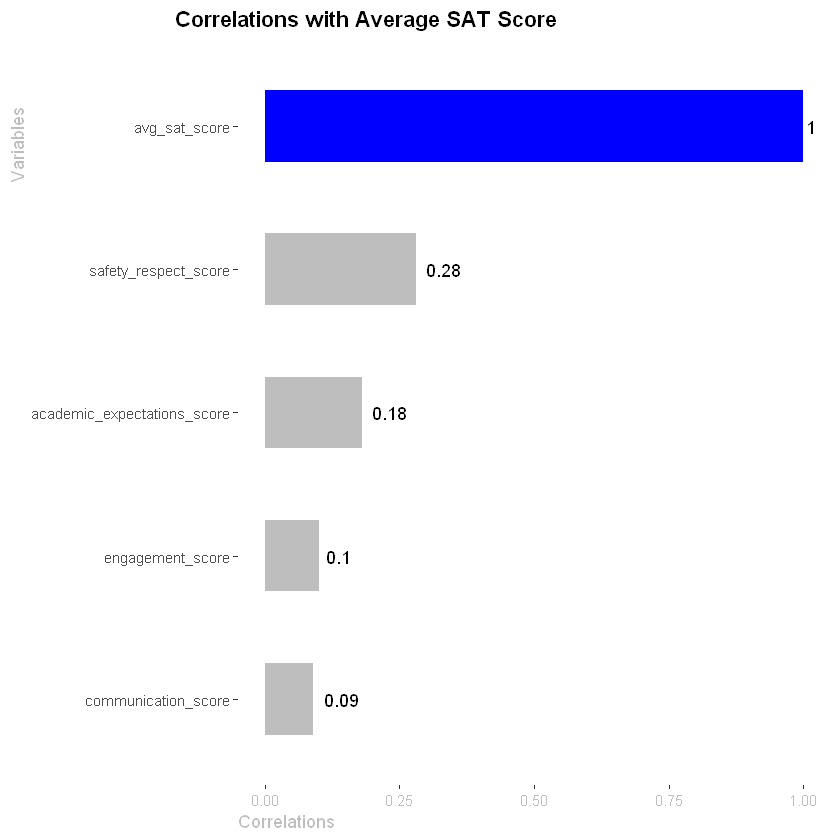

In [17]:
avg_sat_score_corrs <- find_cor("avg_sat_score",c("safety_respect_score","communication_score",
                                                  "engagement_score","academic_expectations_score"),master)
visualize_corrs(corrs= avg_sat_score_corrs, title = "Correlations with Average SAT Score")

From this data, we can clearly see that safety respect score correlates most highly.

Let's try this with additional data.

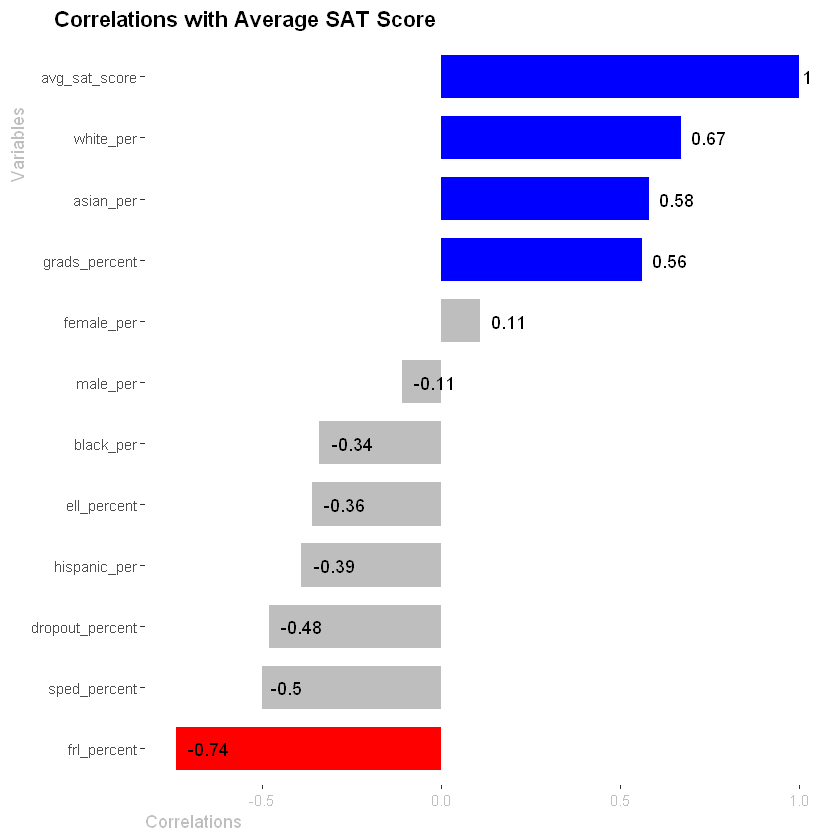

In [18]:
avg_sat_score_corrs_2 <- find_cor("avg_sat_score",c("frl_percent","ell_percent",
                                                    "sped_percent","asian_per","black_per","white_per",
                                                    "hispanic_per","male_per","female_per",
                                                    "grads_percent","dropout_percent"),master)

visualize_corrs(corrs = avg_sat_score_corrs_2, title = "Correlations with Average SAT Score")

Now that we have added additional variables, we can see that there are some variables that correlate very highly with average SAT score, and some of those have very strong negative correlations.


Now let's try this with additional variables.

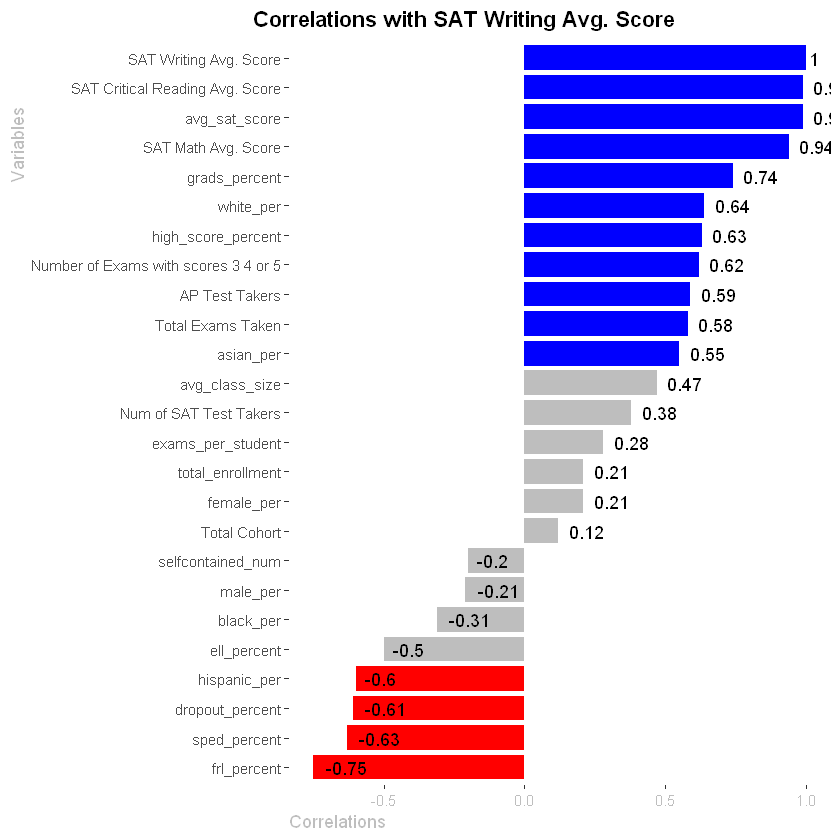

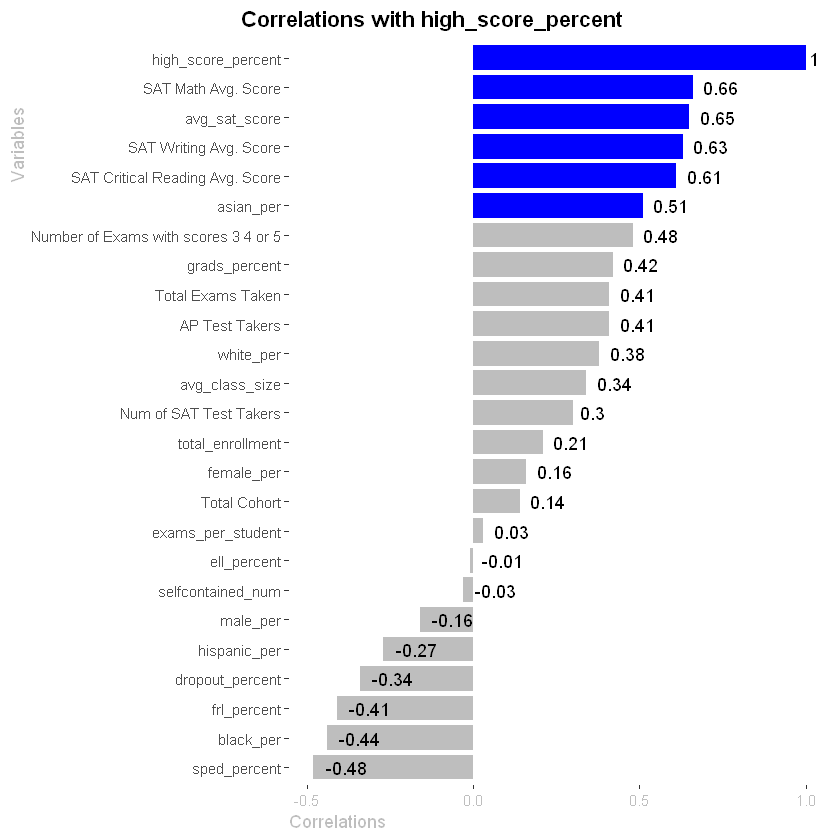

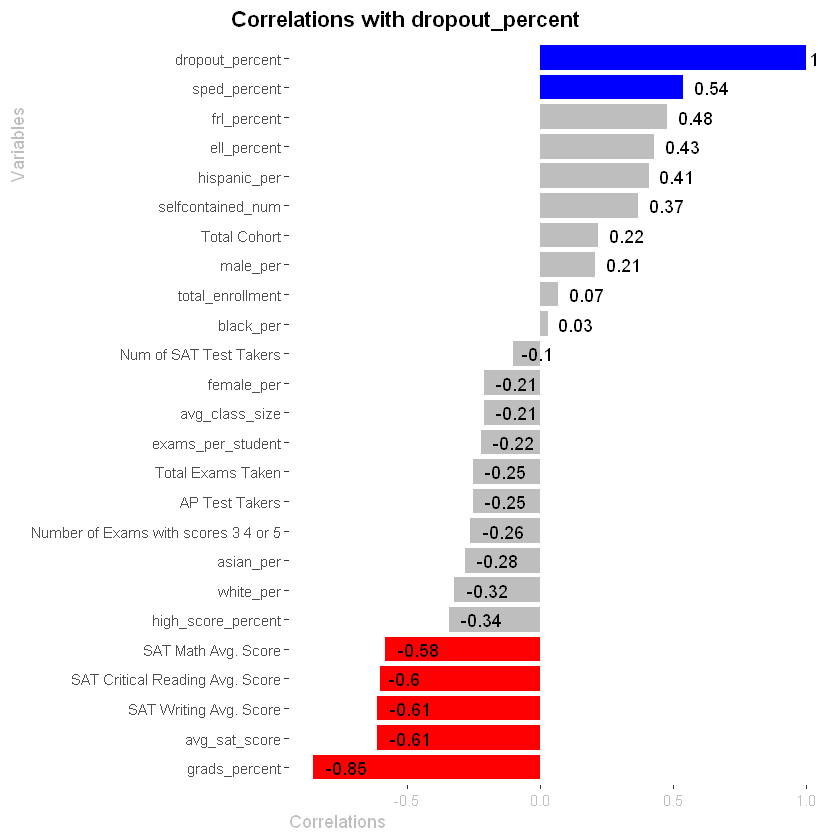

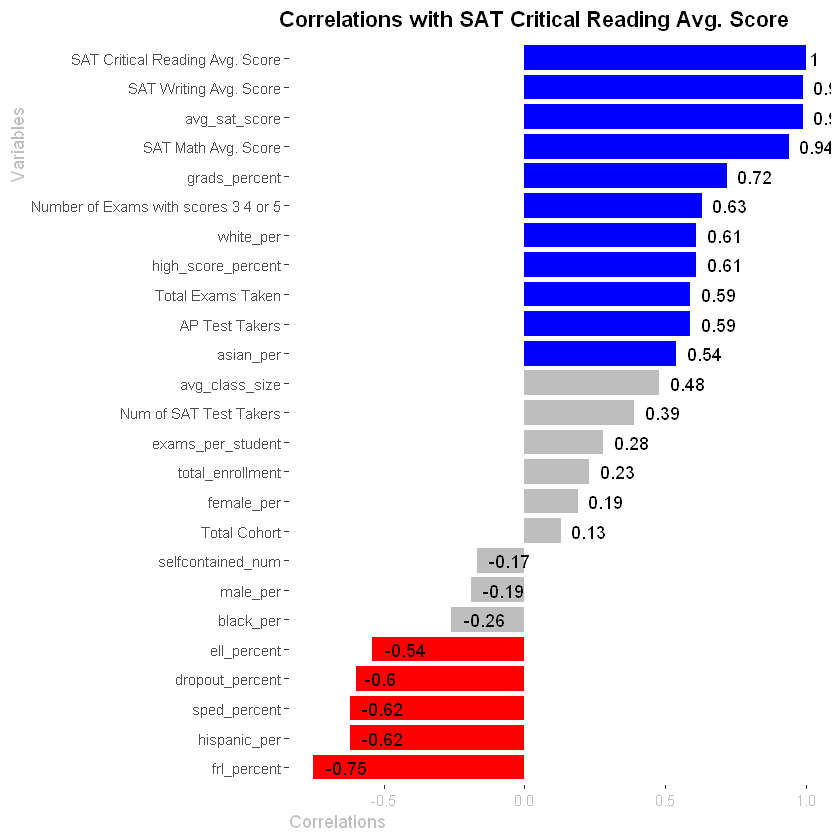

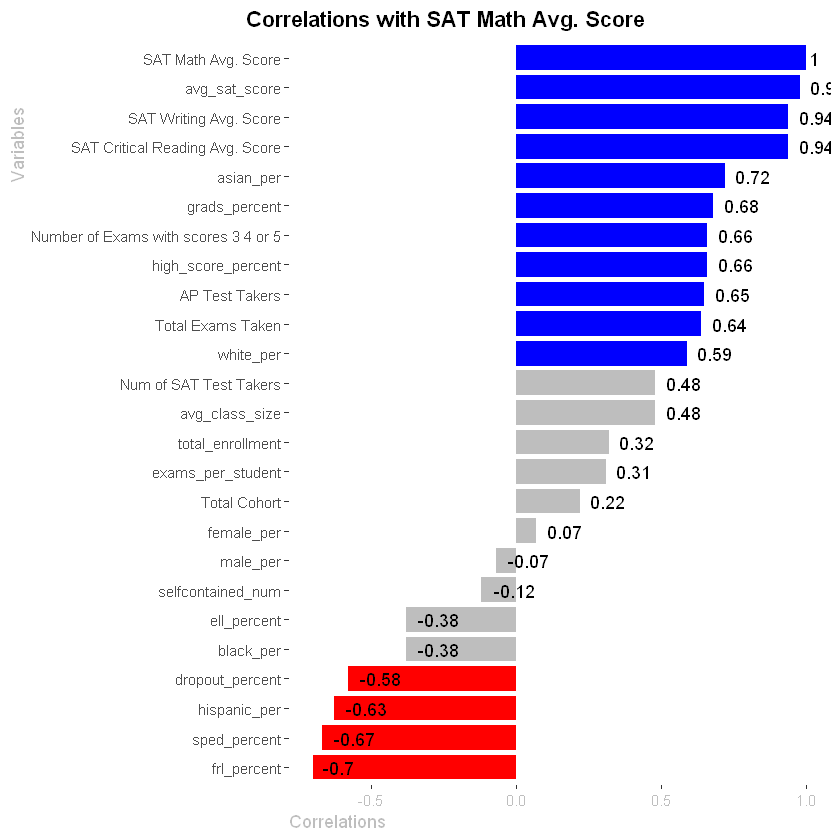

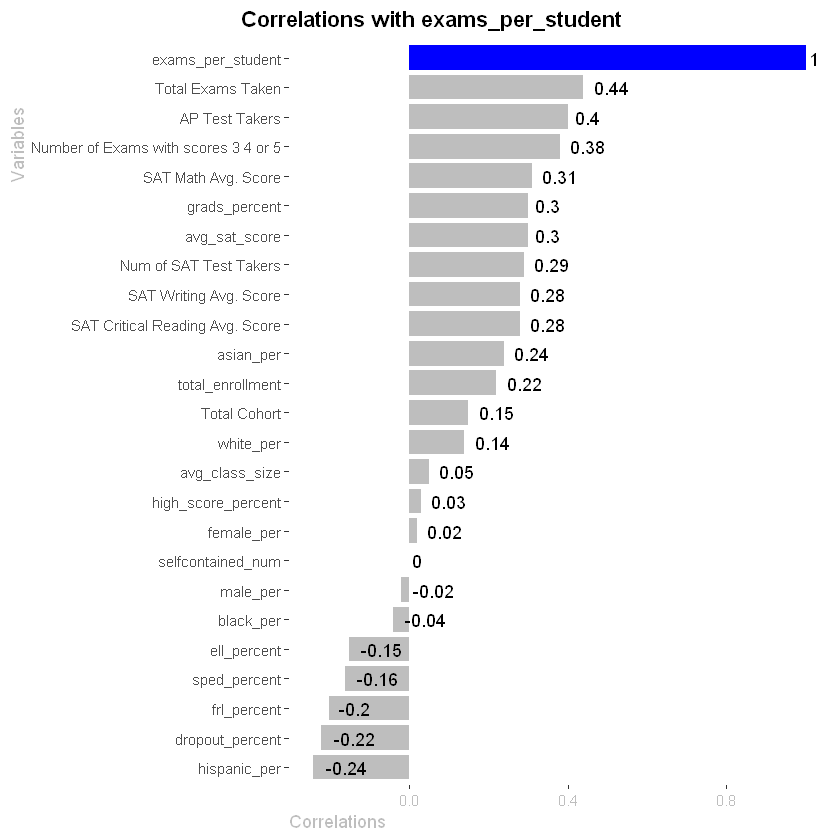

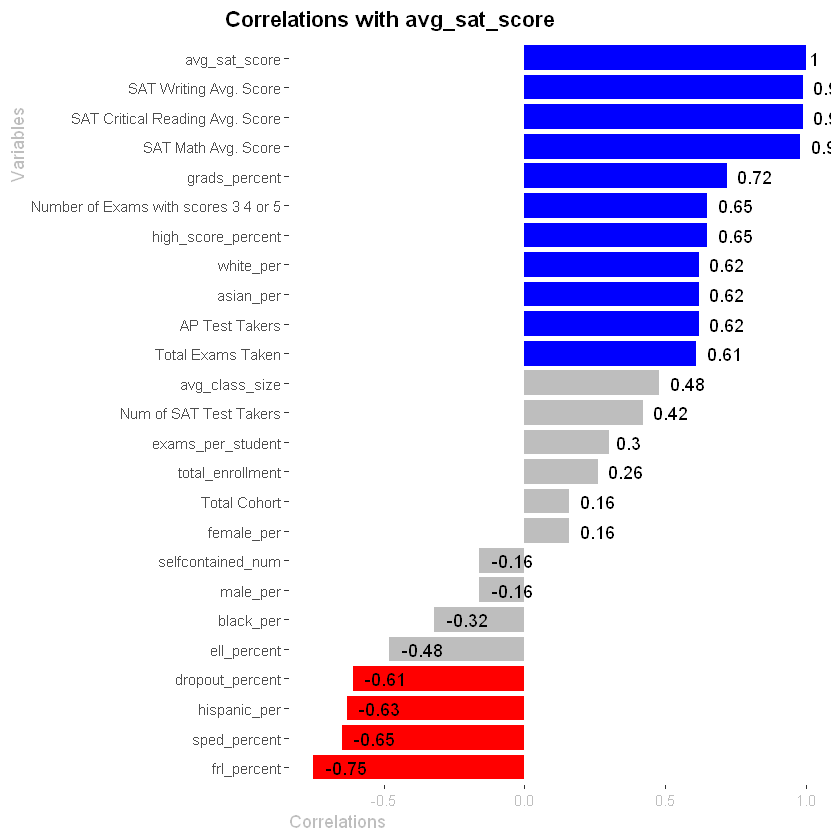

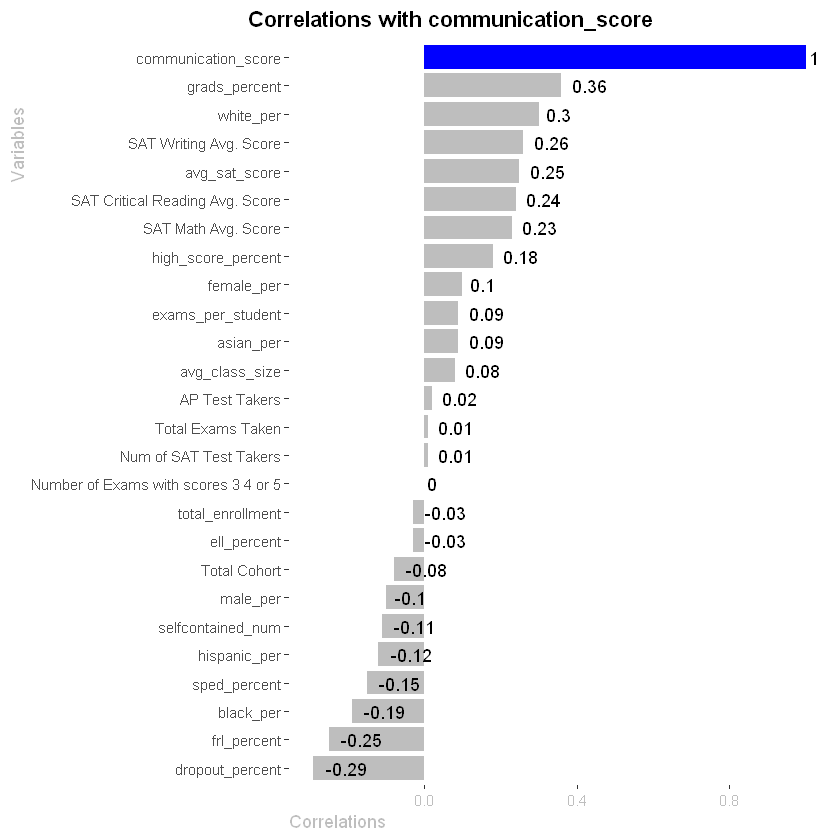

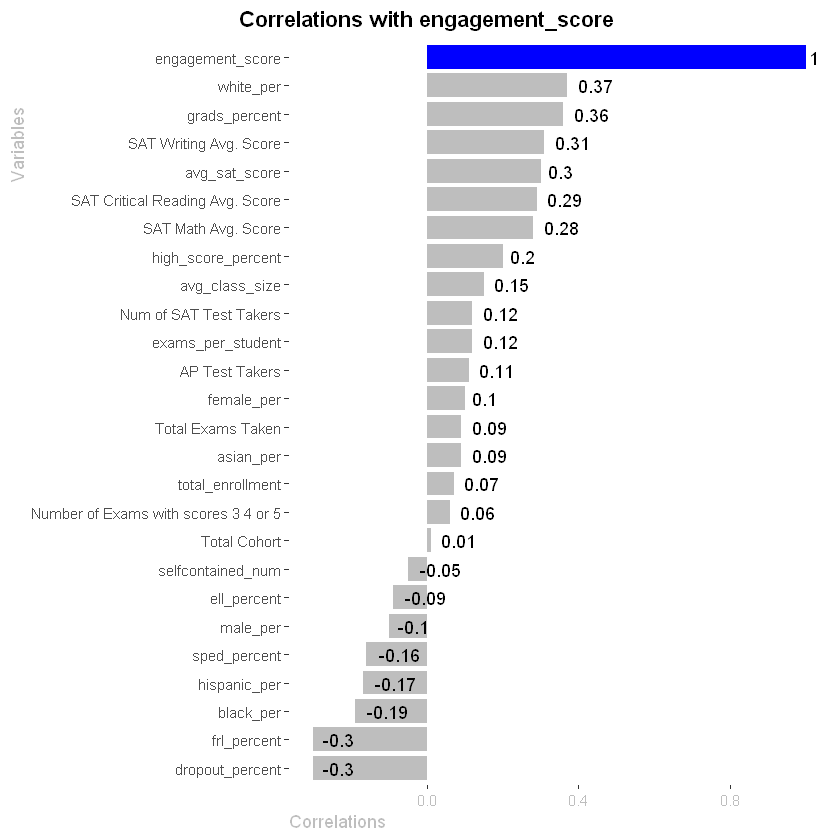

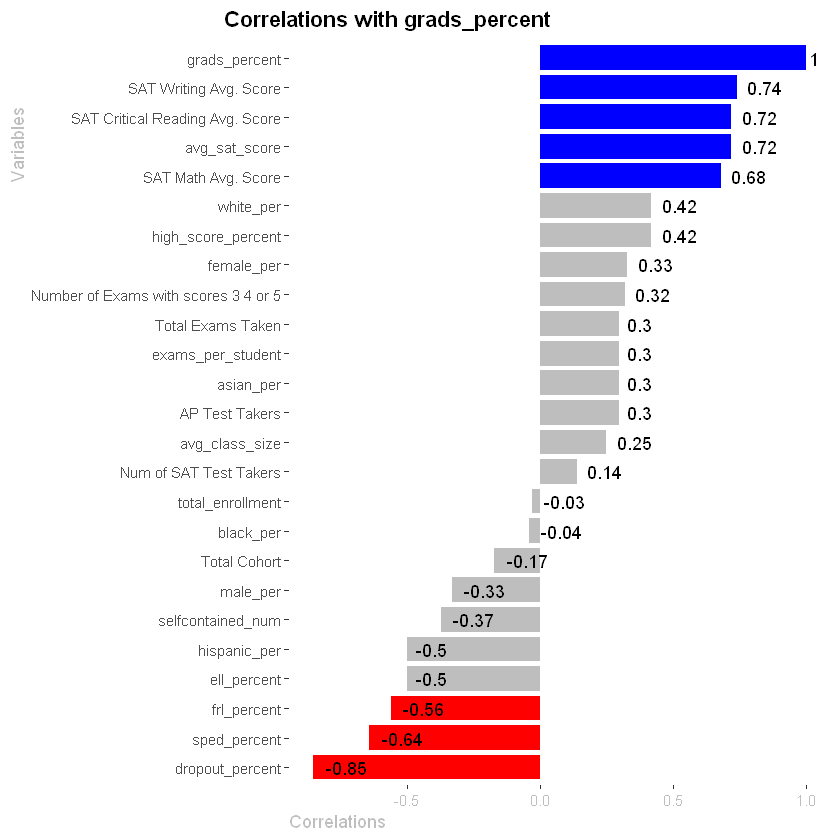

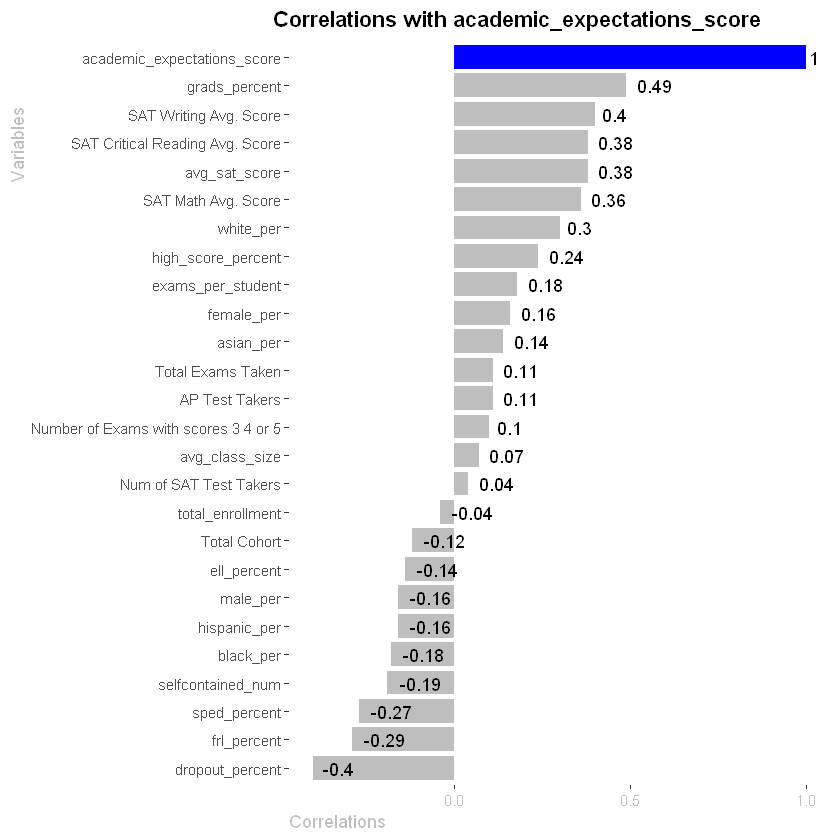

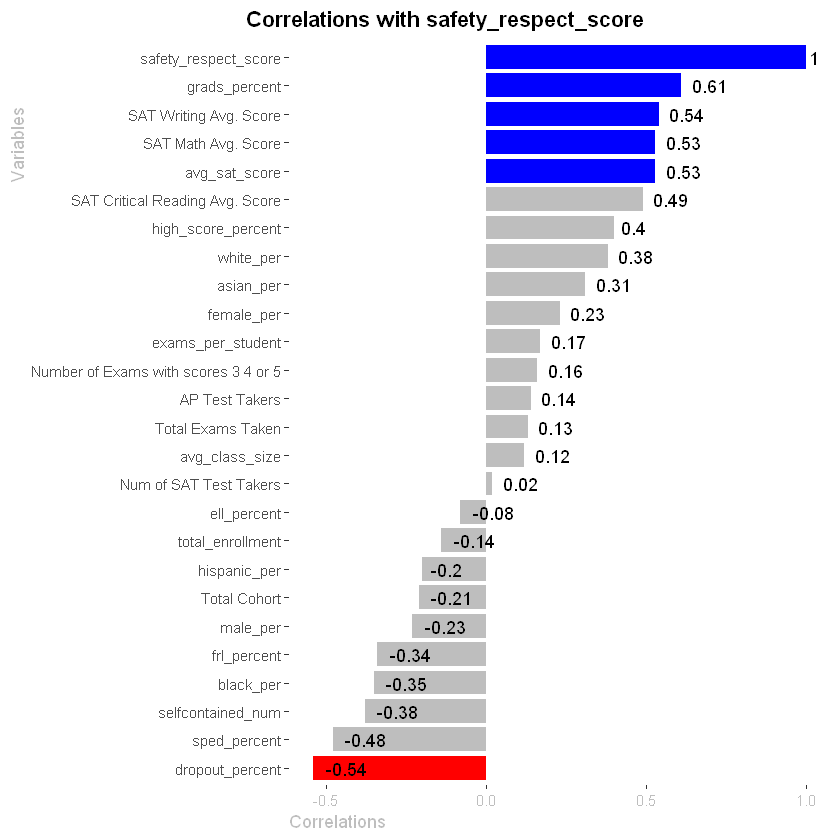

In [19]:
for (measure in school_quality_columns){
  c <- find_cor(measure, numeric_columns,master)
  v <- visualize_corrs(corrs = c, title = paste("Correlations with", as.name(measure)))
  print(v)
}

From these bar charts, we can see that each of our success metrics has its own set of variables that have a strong positive correlation or a strong negative correlation. Let's filter out our weak correlations so that we only see strong correlations.

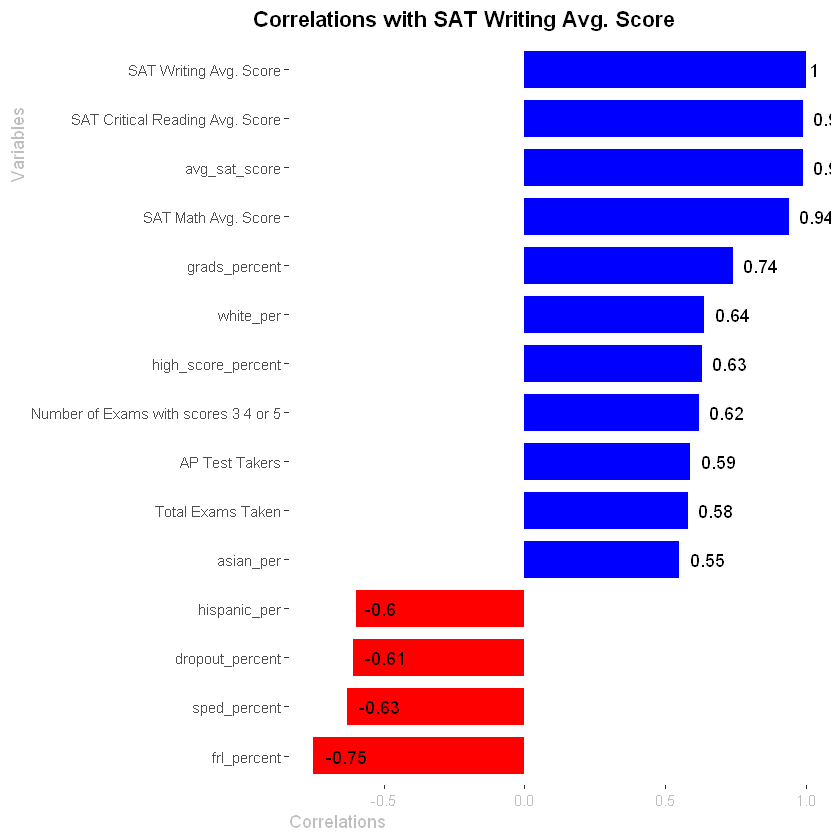

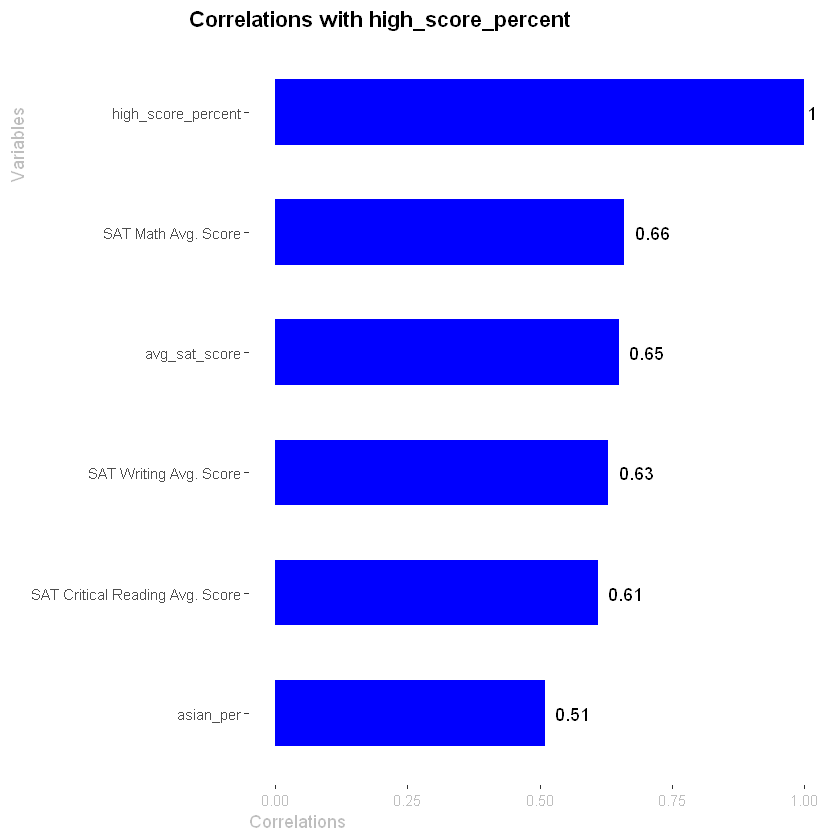

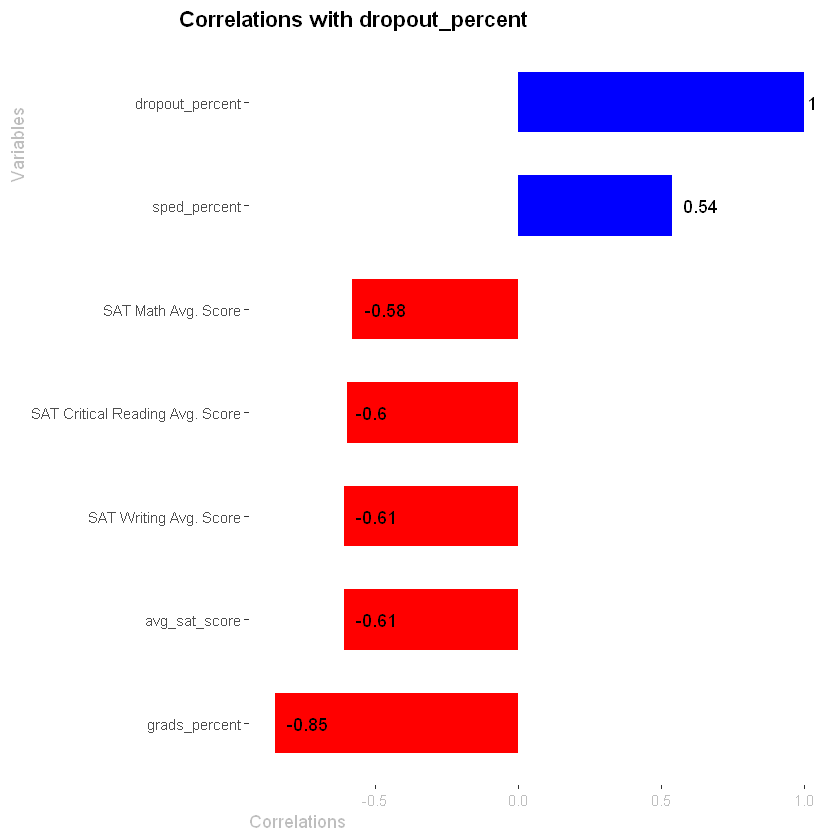

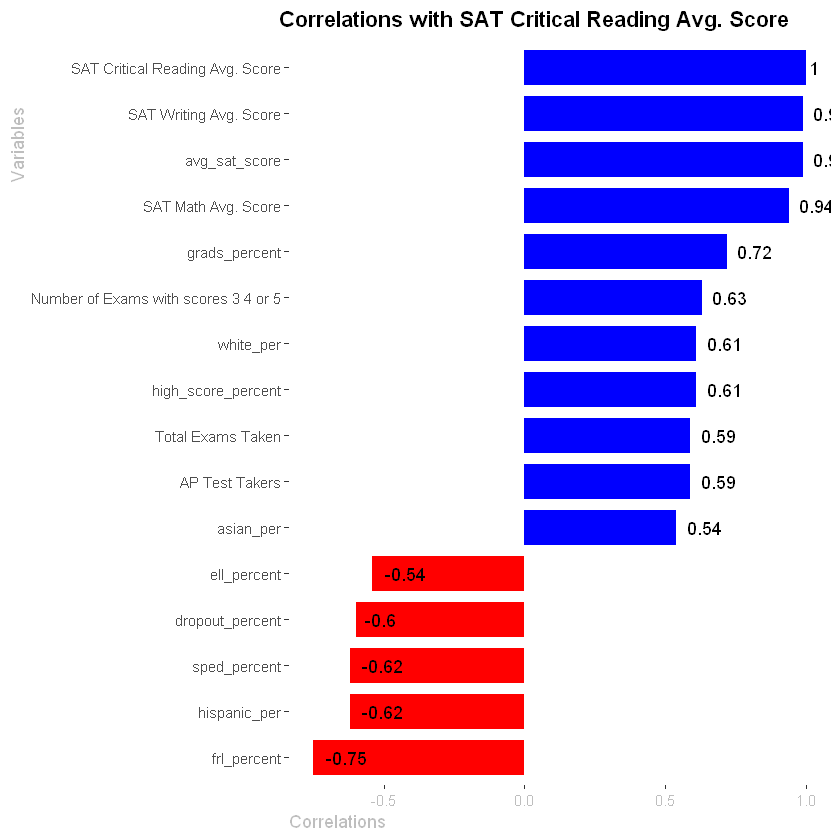

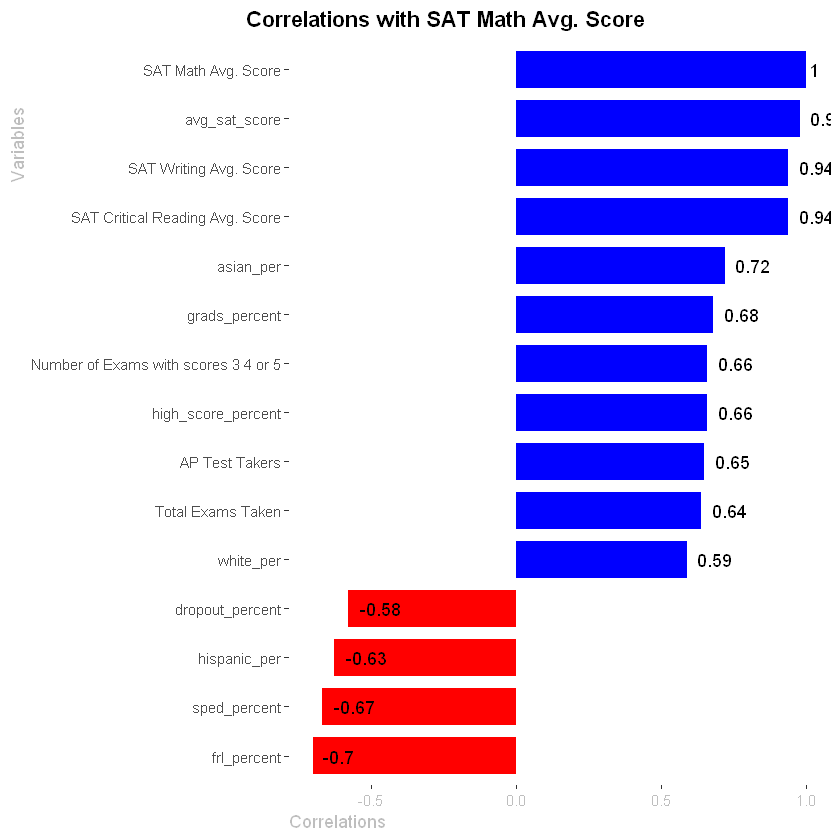

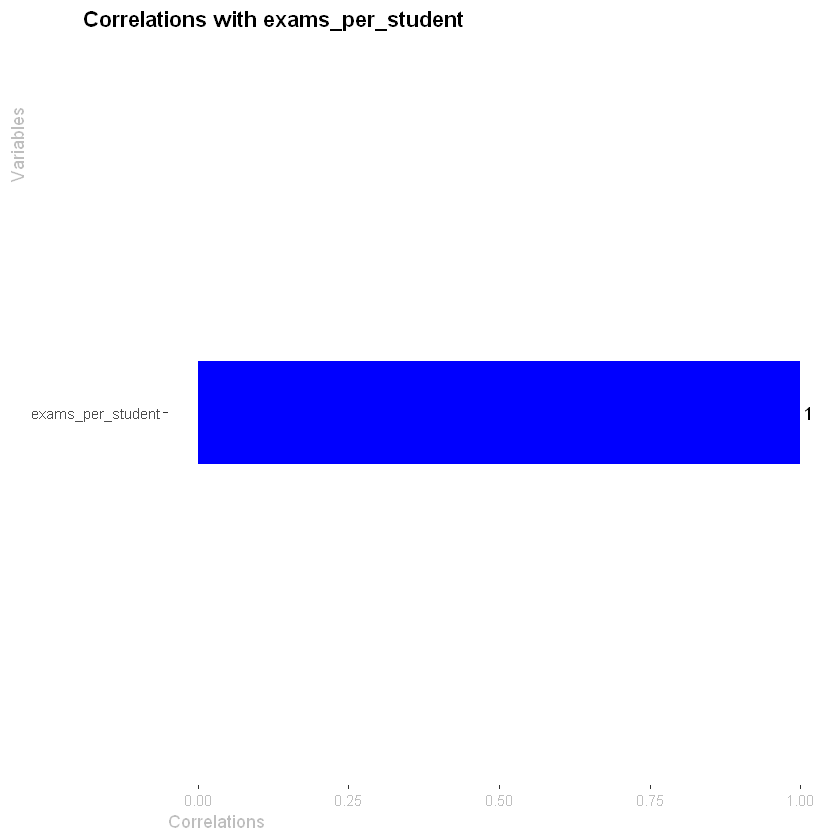

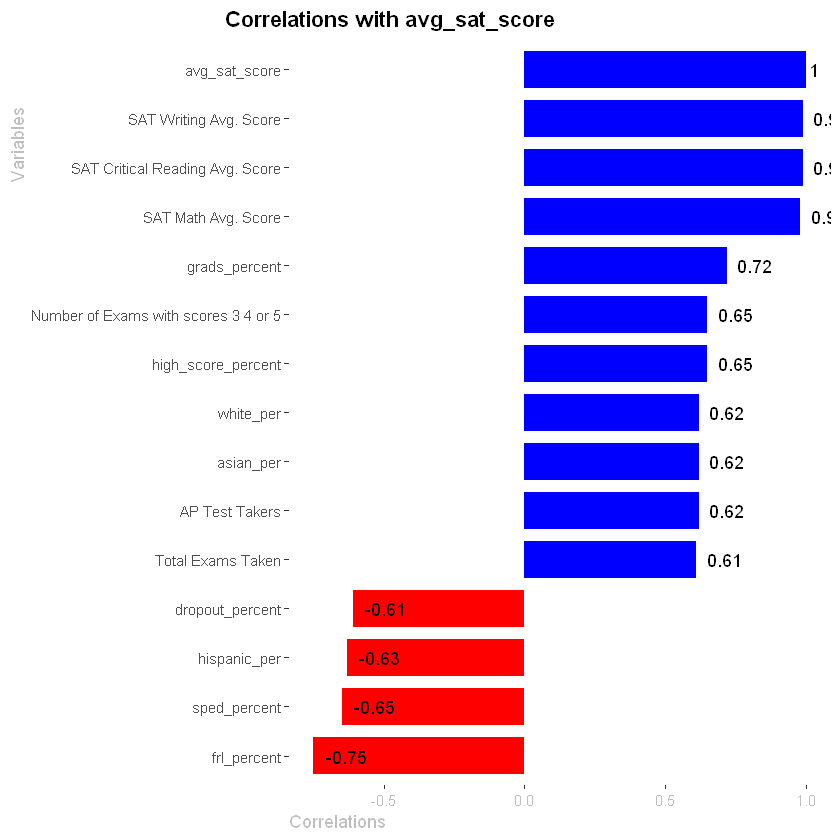

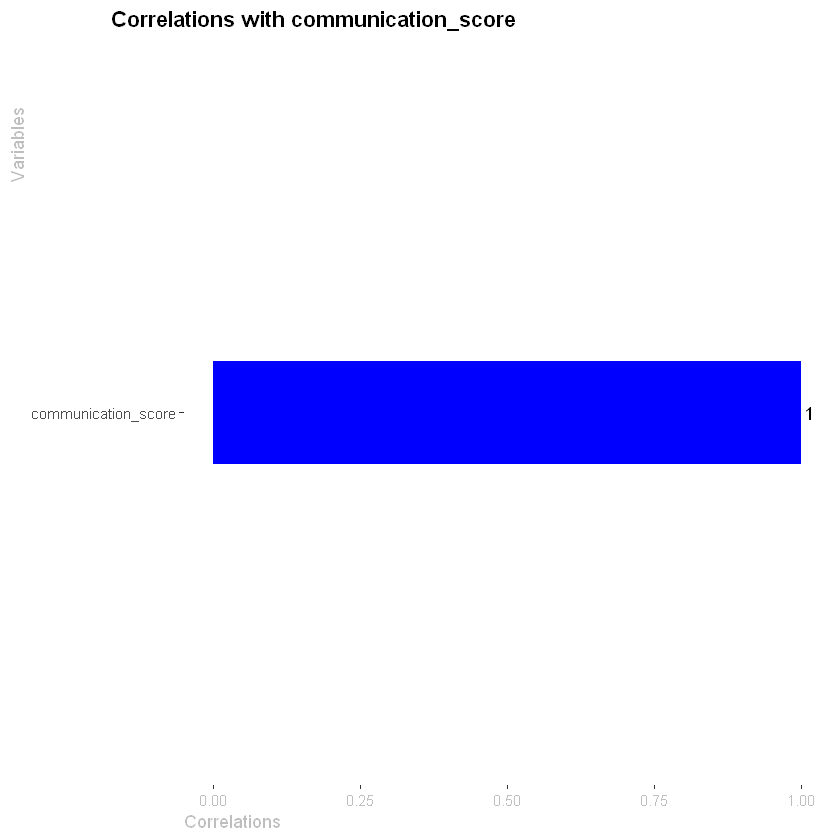

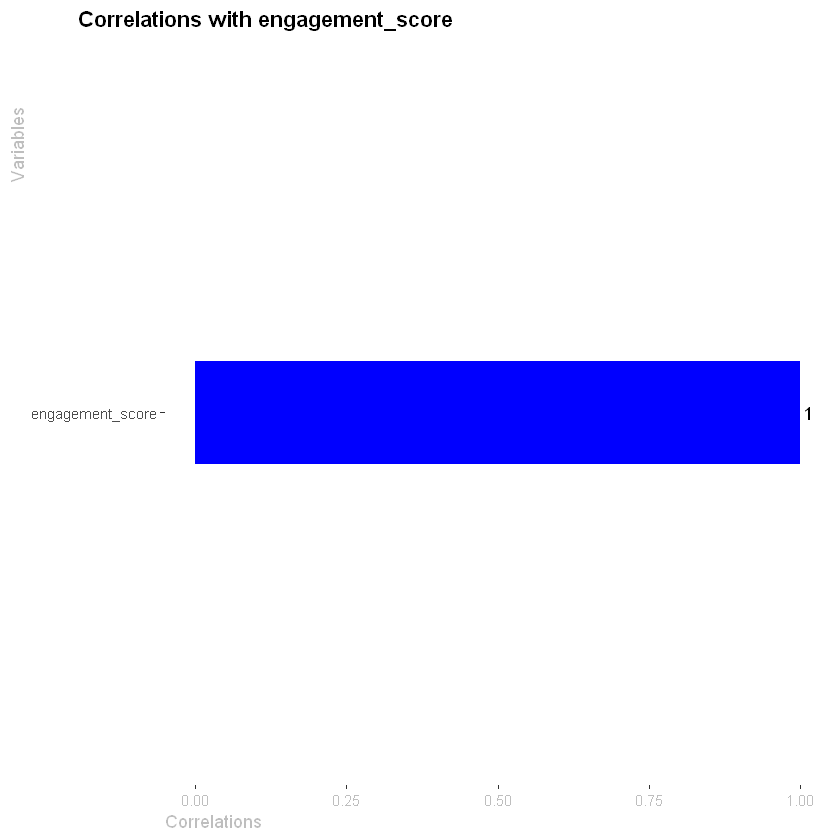

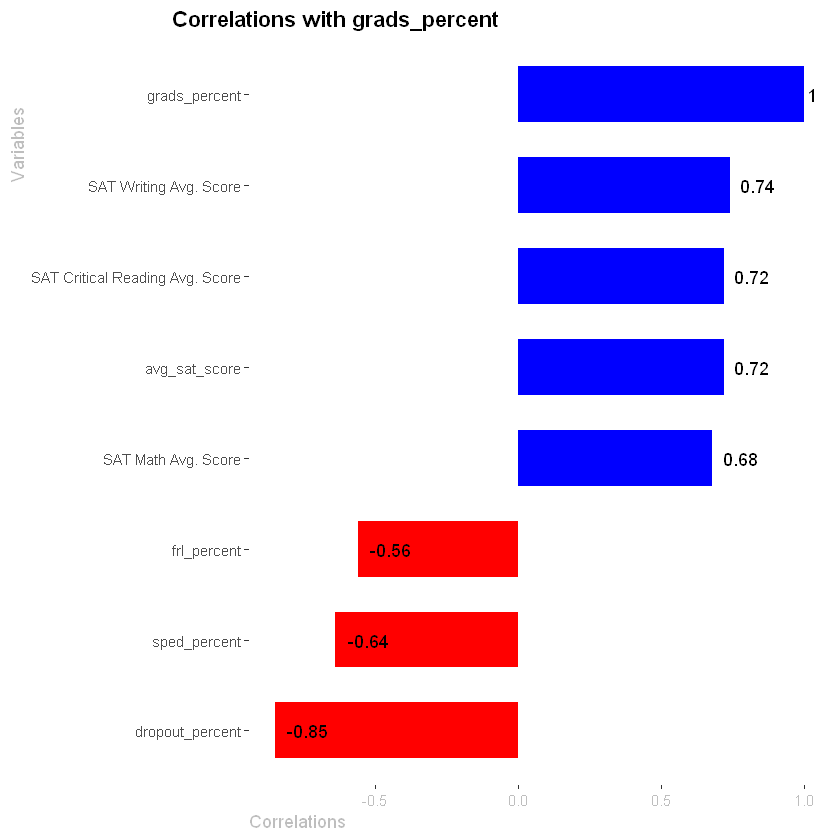

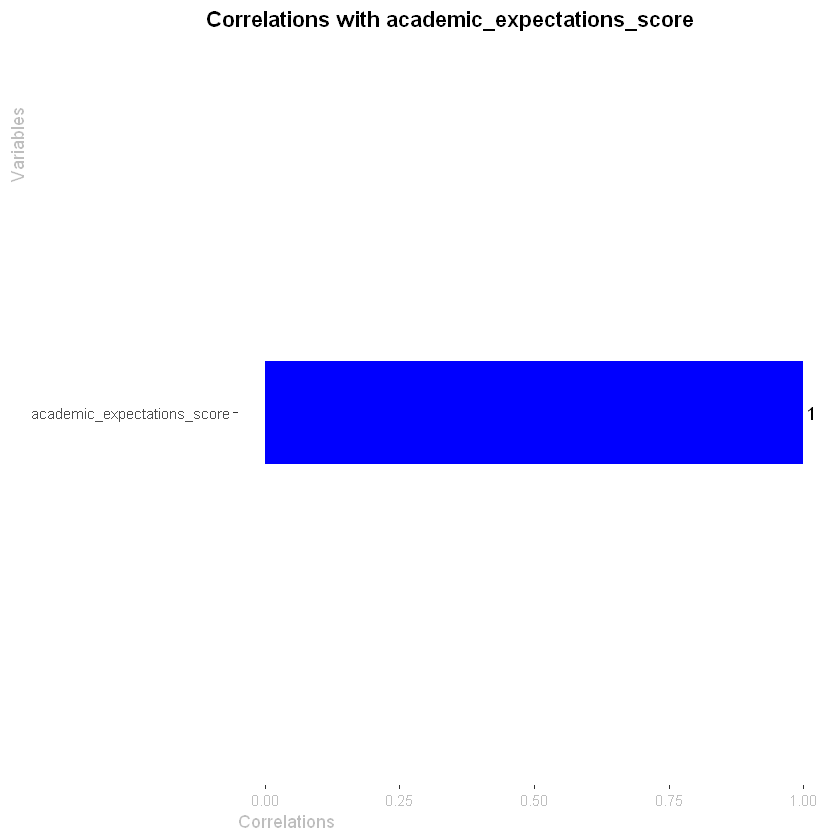

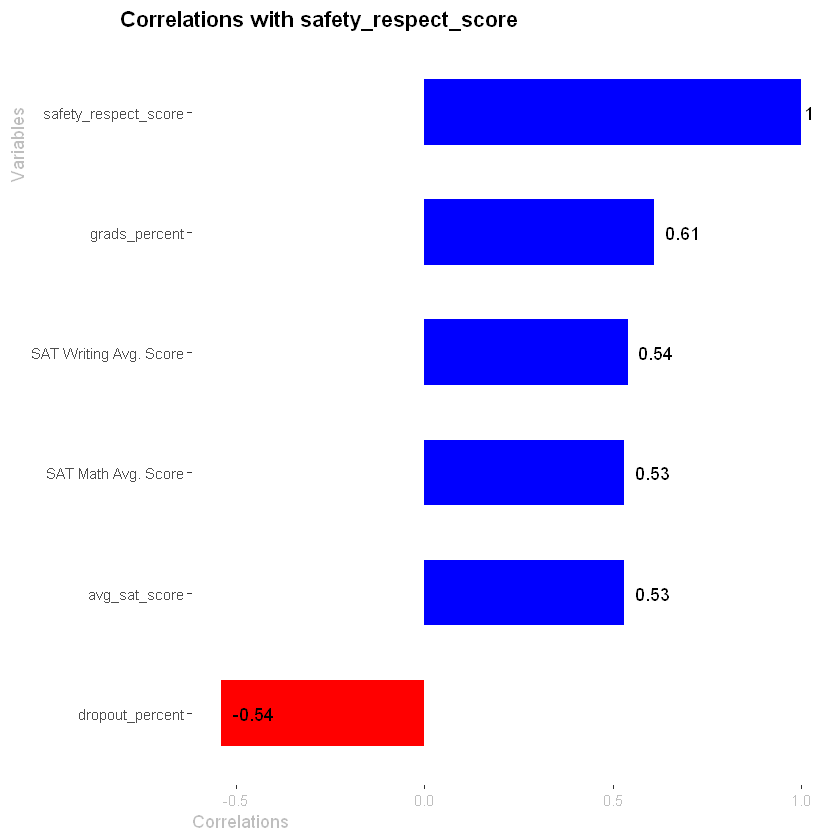

In [20]:
for (measure in school_quality_columns){
  c <- find_cor(measure, numeric_columns,master)
  c <- c %>%
    filter(corr_strength != "Weak Correlation")
  v <- visualize_corrs(corrs = c, title = paste("Correlations with", as.name(measure)))
  print(v)
}

Now we can more easily see the correlations that are most strongly affecting each of our success metrics. 

Now that we've seen these correlations, it would be interesting to see whether parents, students and teachers have similar perceptions about the four school quality metrics they were surveyed about:

  - Safety and Respect
  - Communication
  - Engagement
  - Academic Expectations
  
Let's go back to our dataset and see how these compare between parents, students and teachers.

In [21]:
gened_trimmed_2 <- gened %>%
  select(colnames(gened[1:32]))

d75_trimmed_2 <- d75 %>%
  select(colnames(d75[1:32]))

survey_2 <- gened_trimmed_2 %>%
  rbind(d75_trimmed_2)

head(survey_2)

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
01M015,M015,P.S. 015 Roberto Clemente,0,No,0,Elementary School,NA,88,60,...,7.6,7.9,NA,NA,NA,NA,8.0,7.7,7.5,7.9
01M019,M019,P.S. 019 Asher Levy,0,No,0,Elementary School,NA,100,60,...,8.9,9.1,NA,NA,NA,NA,8.5,8.1,8.2,8.4
01M020,M020,P.S. 020 Anna Silver,0,No,0,Elementary School,NA,88,73,...,6.8,7.5,NA,NA,NA,NA,8.2,7.3,7.5,8.0
01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0,Elementary / Middle School,89,73,50,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
01M063,M063,P.S. 063 William McKinley,0,No,0,Elementary School,NA,100,60,...,7.8,8.1,NA,NA,NA,NA,8.5,7.6,7.9,8.0
01M064,M064,P.S. 064 Robert Simon,0,No,0,Elementary School,NA,94,61,...,8.3,8.5,NA,NA,NA,NA,8.7,7.9,8.2,8.5


Let's look at the size of our new data set.

In [22]:
print(paste("Number of rows:", nrow(survey_2)))
print(paste("Number of columns:", ncol(survey_2)))

[1] "Number of rows: 1702"
[1] "Number of columns: 32"


Let's see how many rows we are left with once we drop all rows that have any NA values. The effect of this is likely to remove any non-high schools.

In [23]:
survey_2 <- survey_2 %>%
  drop_na()

print(paste("Number of rows:", nrow(survey_2)))
print(paste("Number of columns:", ncol(survey_2)))

[1] "Number of rows: 492"
[1] "Number of columns: 32"


Now, we're left with a data set that is about one quarter of the original size. Since it's still a large dataset, let's keep it. Let's now reshape our data so that we can create boxplots with our data.

In [24]:
survey_3 <- survey_2 %>%
  gather(key = "Survey Question", value = score, colnames(.[8:32])) %>%
  mutate(response_type = str_sub(`Survey Question`, start = regexpr("_[tsp]",`Survey Question`)+1,
                                                             end = (regexpr("_[tsp]",`Survey Question`))+1)) %>%
  filter(!`Survey Question` %in% c("aca_tot_11","com_tot_11","eng_tot_11","saf_tot_11")) %>%
  mutate(response_type = ifelse(response_type == "p", "parent",
                                ifelse(`response_type` == "s", "student", "teacher"))) %>%
  mutate(metric = str_sub(`Survey Question`, end = regexpr("_", `Survey Question`)-1)) %>%
  mutate(metric = ifelse(metric == "aca","academic expectations",
                         ifelse(metric == "com", "communication",
                                ifelse(metric == "eng", "engagement",
                                       ifelse(metric == "N", "number",
                                              ifelse(metric == "nr","number eligible",
                                                     ifelse(metric == "rr", "response rate", "safety")))))))

survey_3

dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,Survey Question,score,response_type,metric
01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0,Elementary / Middle School,rr_s,89,student,response rate
01M140,M140,P.S. 140 Nathan Straus,0,Yes,0,Elementary / Middle School,rr_s,98,student,response rate
01M184,M184,P.S. 184 Shuang Wen,0,Yes,0,Elementary / Middle School,rr_s,96,student,response rate
01M188,M188,P.S. 188 The Island School,0,Yes,0,Elementary / Middle School,rr_s,82,student,response rate
01M301,M301,"Technology, Arts, and Sciences Studio",0,Yes,0,Middle School,rr_s,99,student,response rate
01M332,M332,University Neighborhood Middle School,0,Yes,0,Middle School,rr_s,96,student,response rate
01M345,M345,"Collaborative Academy of Science, Technology, & La",0,Yes,0,Middle School,rr_s,100,student,response rate
01M378,M378,School for Global Leaders,0,Yes,0,Middle School,rr_s,78,student,response rate
01M839,M839,Tompkins Square Middle School,0,Yes,0,Middle School,rr_s,88,student,response rate
02M104,M104,J.H.S. 104 Simon Baruch,0,Yes,0,Middle School,rr_s,96,student,response rate


Now that we've reshaped our data, let's create functions that will allow us to make boxplots.

In [26]:
make_boxplot_data <- function(dat, chosen_metric){
  dat %>%
    filter(metric == chosen_metric)
    }
    
make_boxplot <- function(dat, metric = dat$metric) {
  ggplot(data = dat) +
  aes(x = reorder(response_type,score, FUN = mean), y = score) +
  geom_boxplot() +
  coord_flip()+
  theme(panel.background = element_blank()) +
  labs(title = paste("Average", metric, "by group"), x = "group", y = metric) +
  theme(plot.title = element_text(hjust = -0.1, face = "bold"), axis.title.y = element_text(hjust=0.9, vjust= 2, color = "gray"), 
          axis.title.x = element_text(hjust=0, color = "gray"), axis.text.x = element_text(color = "gray"),
          legend.position = "none")
}

Now, let's create boxplots.

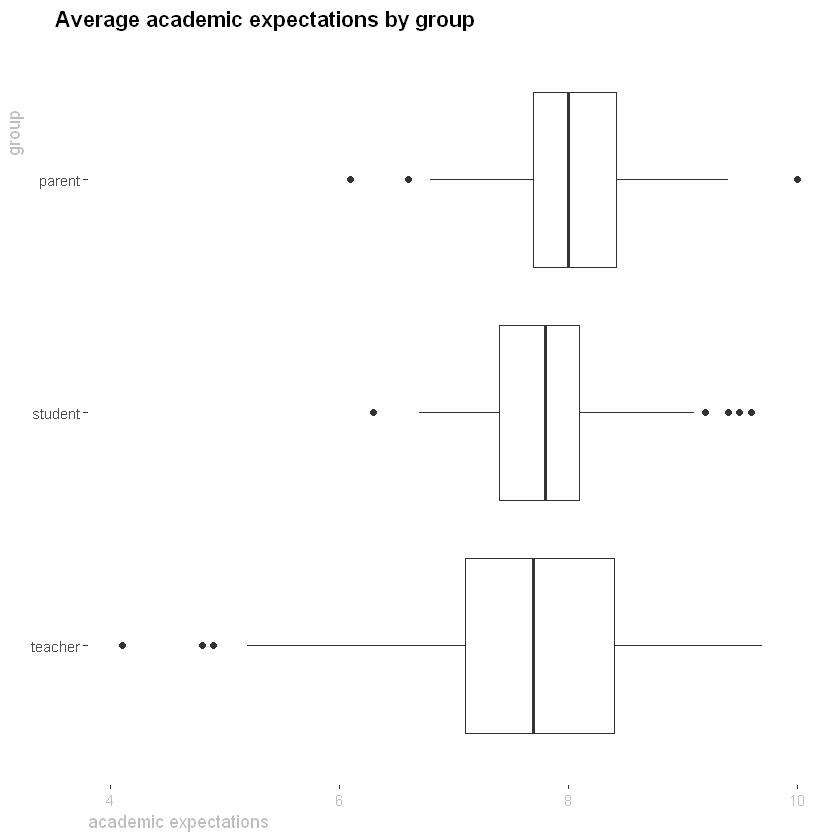

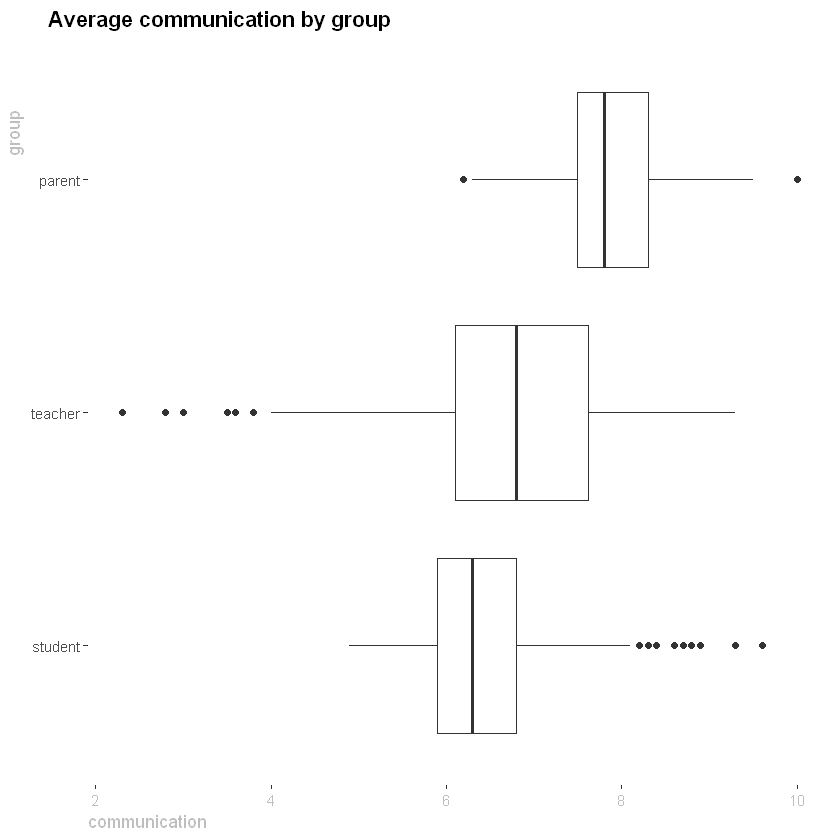

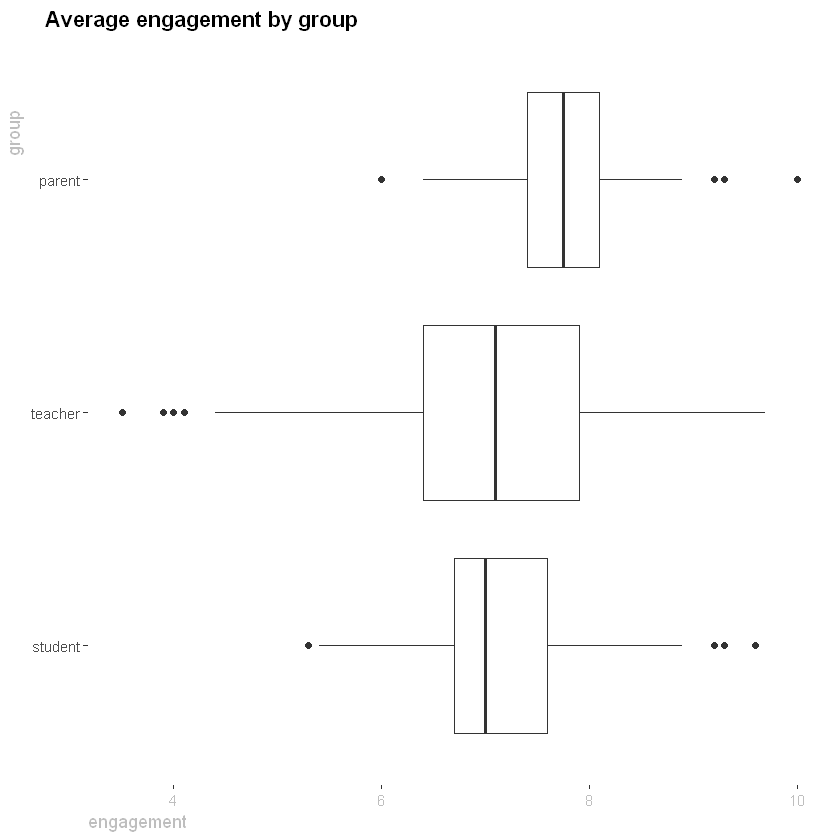

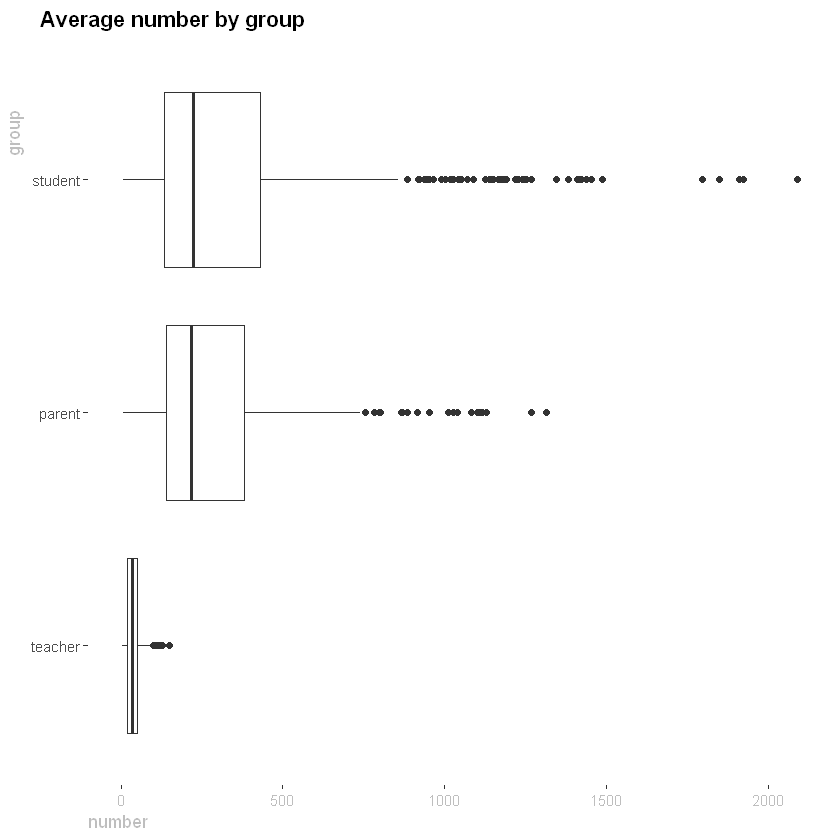

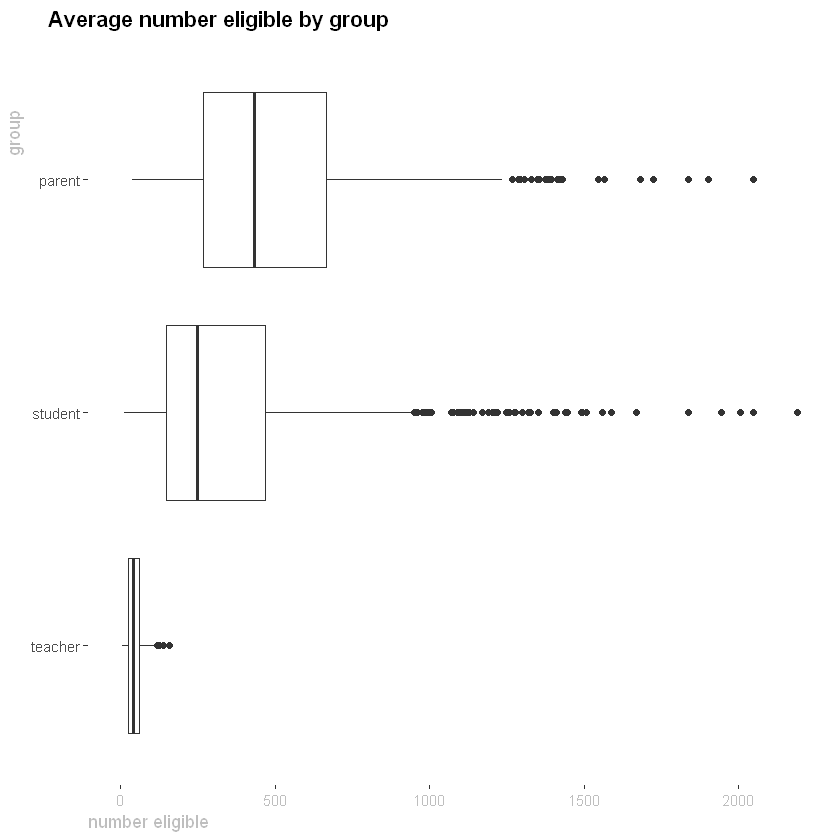

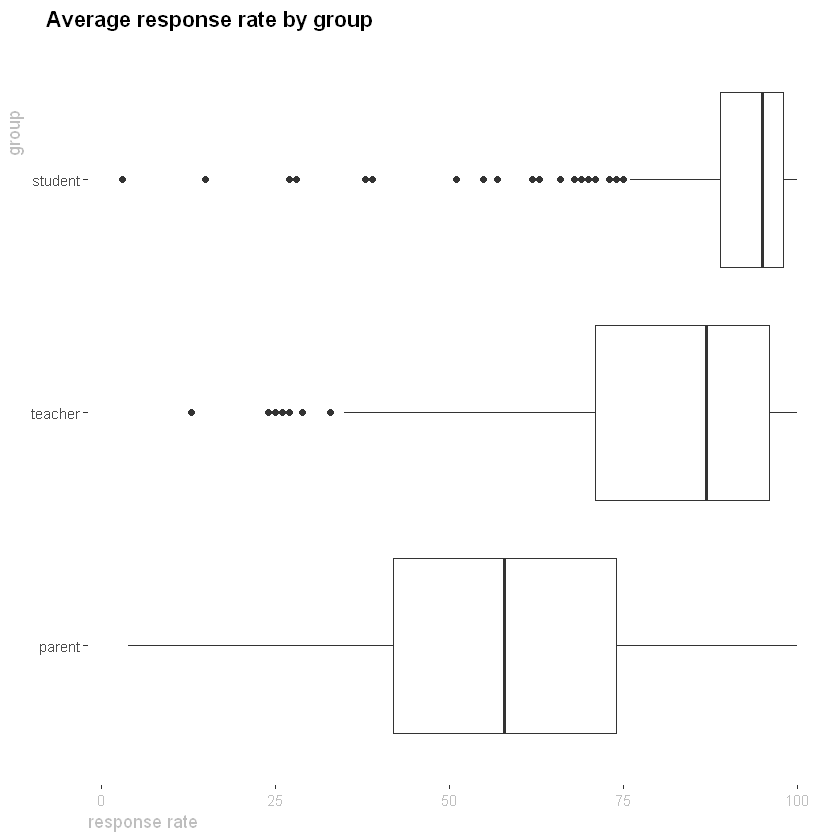

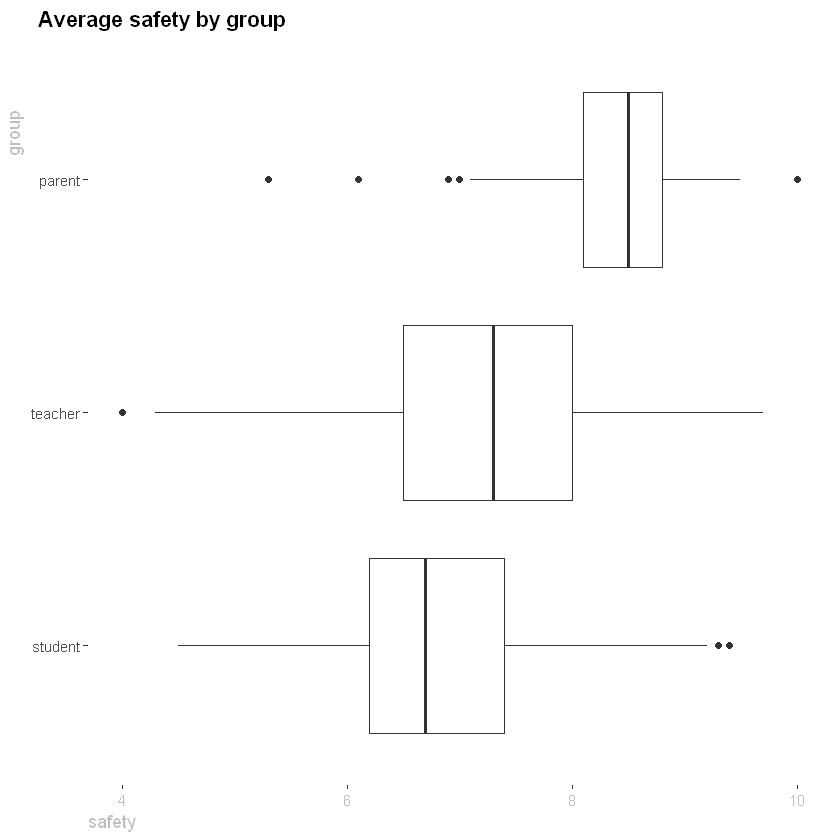

In [28]:
metrics <- count(survey_3,metric)[1]
for (m in unlist(metrics)){
  boxplot_data <- make_boxplot_data(survey_3,m)
  boxplot <- make_boxplot(boxplot_data)
  print(boxplot)
}

In addition to boxplots, let's create barcharts. Let's first create a couple of functions that will help us create barcharts.

In [30]:
make_bar_chart_data <- function(dat, chosen_measure){
  dat %>%
  filter(metric == chosen_measure) %>%
  group_by(response_type) %>%
  summarize(avg_score = round(mean(score),1)) %>%
  arrange(desc(avg_score)) %>%
  mutate(highest_score = ifelse(avg_score == max(avg_score),TRUE,FALSE), measure = chosen_measure)
}

make_bar_chart <- function(dat, measure = dat$measure){
  ggplot(data = dat) +
  aes(x = reorder(response_type, avg_score), y = avg_score, fill = highest_score) +
  scale_fill_manual(values = c("TRUE" = "blue", "FALSE" = "light gray"))+
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = paste("Average", measure, "by group"), x = "group", y = measure)+
  theme(panel.background = element_blank()) +
  geom_text(aes(label= avg_score,hjust = -0.1)) +
  theme(plot.title = element_text(hjust = -0.1, face = "bold"), axis.title.y = element_text(hjust=0.9, vjust= 2, color = "gray"), 
          axis.title.x = element_text(hjust=0, color = "gray"), axis.text.x = element_text(color = "gray"),
          legend.position = "none") 
  
}

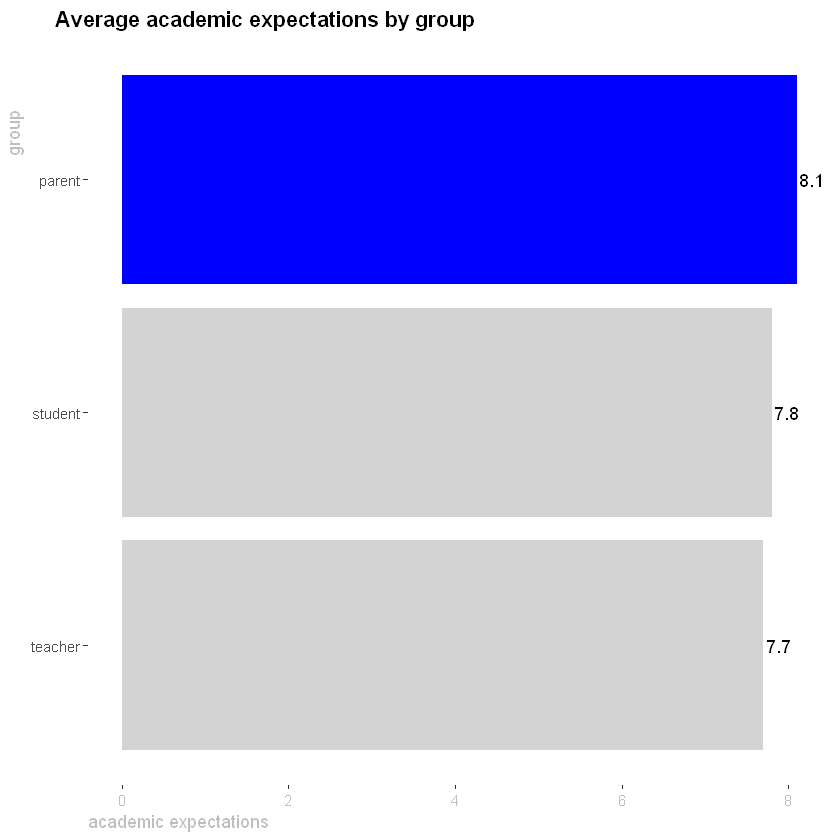

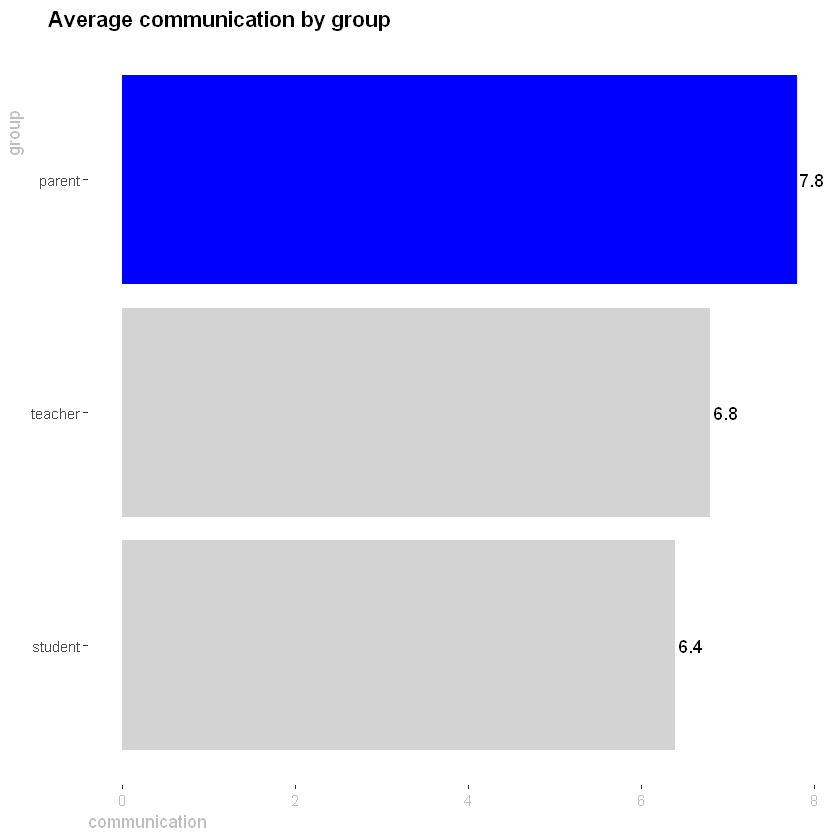

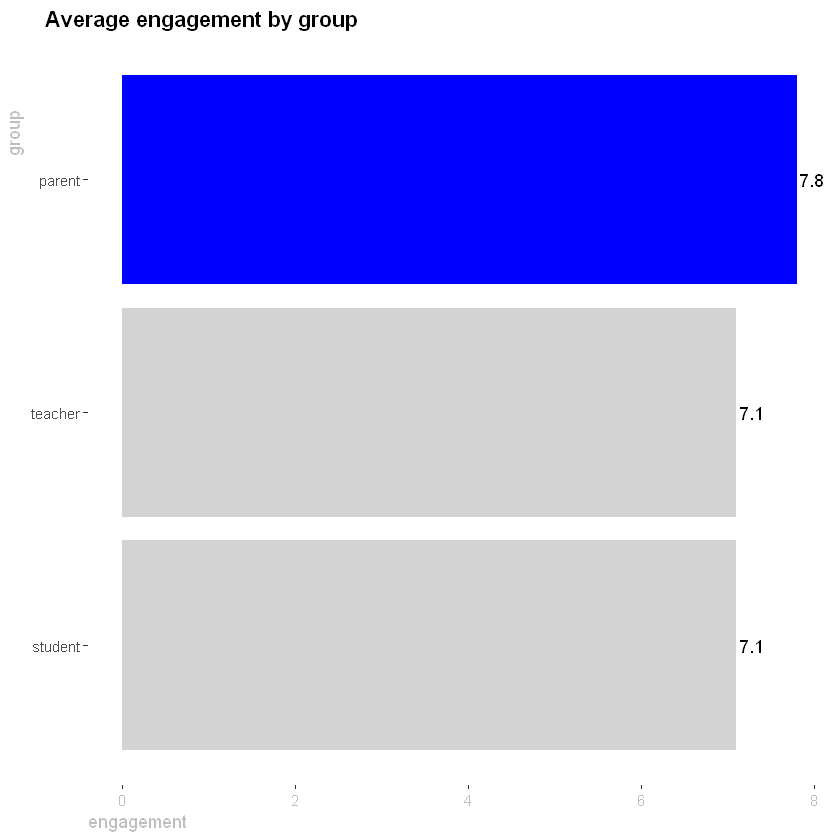

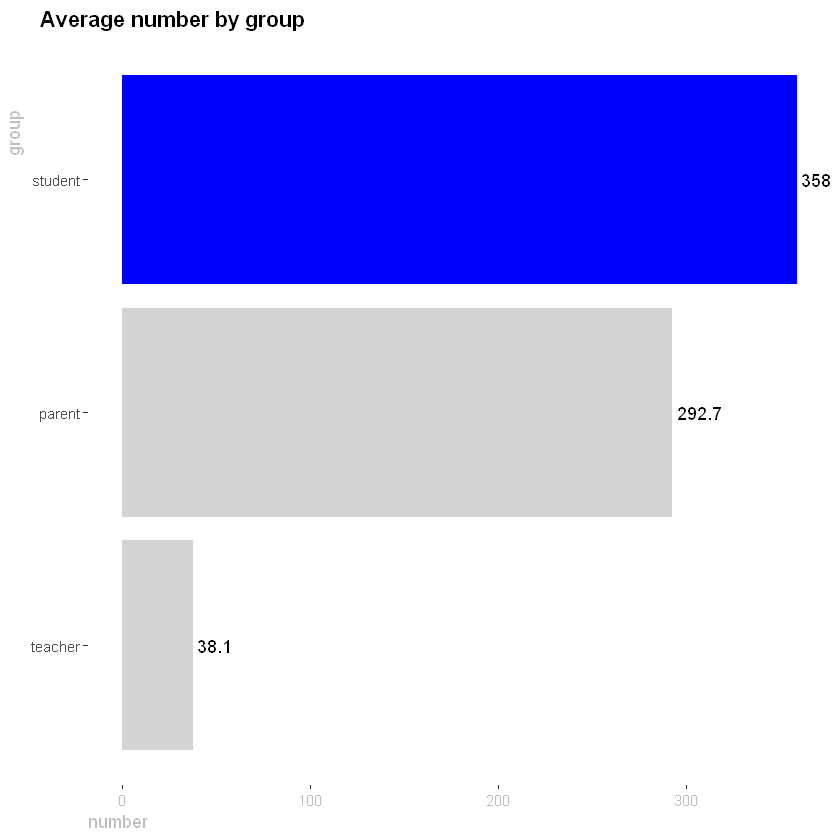

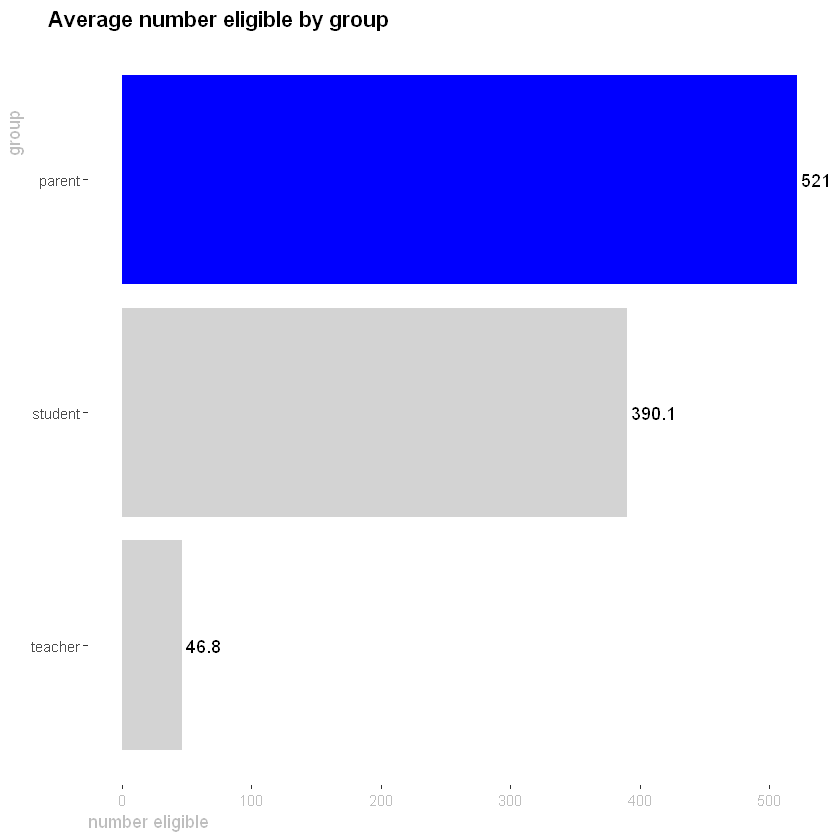

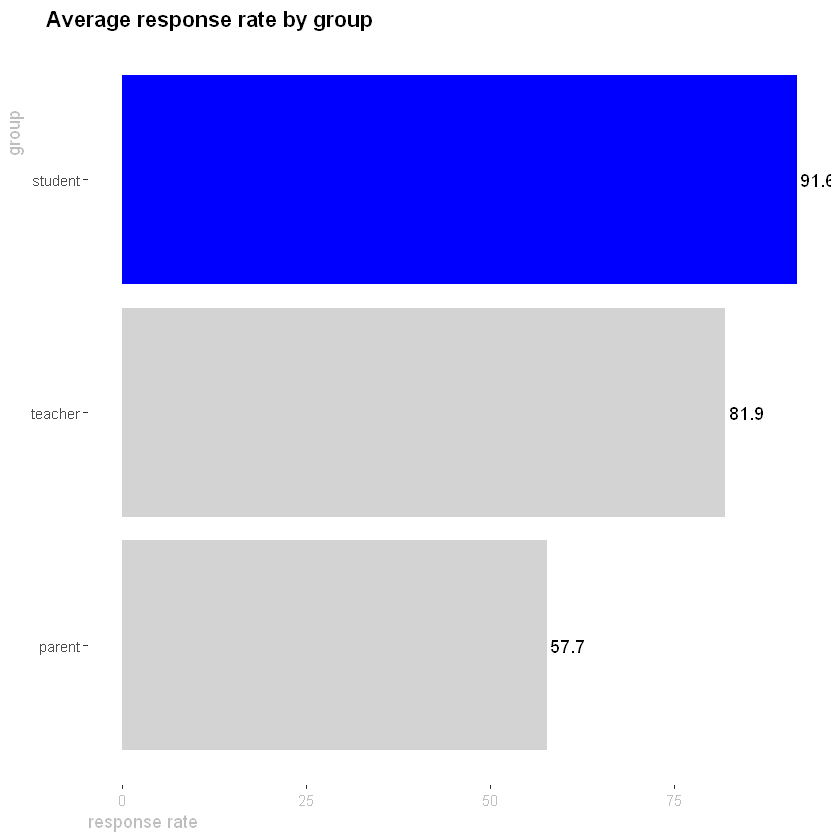

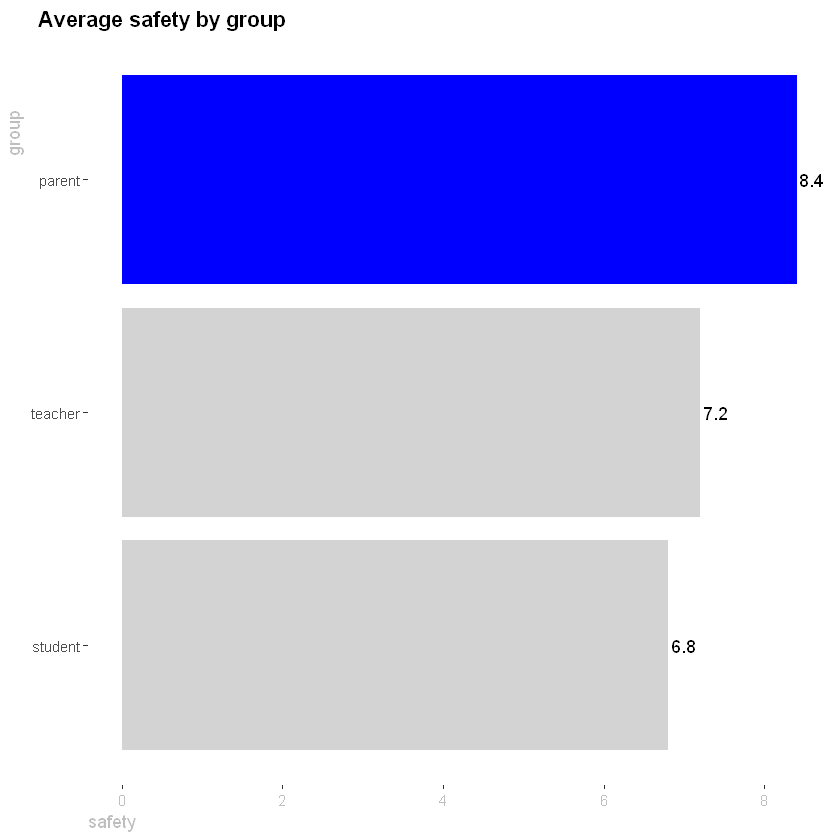

In [31]:
for (m in unlist(metrics)){
  bar_chart_data <- make_bar_chart_data(survey_3,m)
  bar_chart <- make_bar_chart(bar_chart_data)
  print(bar_chart)
}